### IDs:
Insert yours IDs to the cell below

ID #1: 
ID #2: 

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
from scipy.stats import binom, nbinom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

If we mark a defective product as a success and let $X$ be the number of defected products in the batch, then $X\sim Bin(n, 0.03)$

$P\{X \ge 1\} = 1-P\{X\le 0\} = 1-F_X(0)$

Where $F_X$ is the cumulative distribution function of $X$.

We can calculate $F_X(0)$ directly:
$$F_X(0) ={n\choose 0}0.97^{n}\cdot0.03^0=0.97^{n}$$
Solving the equation $1-0.97^{n}=0.85$ yields:
$$0.97^n=0.15\Longrightarrow$$
$$n=\log_{0.97}(0.15)$$

In [2]:
from math import log
log(0.15, 0.97)  # Use ceil

62.2839575139403

But solving that problem for a general number of defective products is not an easy task. Thus we rather choose to solve it numerically by defining a general function `find_trials`:

In [3]:
def find_trials(succ_rate, p, defectives):
    assert (0 <= p <= 1) and (0 <= succ_rate <= 1), 'All probabilities must be between 0 and 1'
    i = 1
    rv = binom(i,p)
    while (1-rv.cdf(defectives-1)) < succ_rate:
        i += 1
        rv = binom(i, p)
    return i

In [4]:
trials = find_trials(succ_rate=0.85, p=0.03, defectives=1)
trials

63

Let us validate the result using our calculation of $F_X$:

In [5]:
1 - (0.97**trials)

0.8532360949640706

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [6]:
find_trials(0.95, 0.04, 1)

74

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [7]:
find_trials(0.9, 0.1, defectives=5)

78

In [8]:
find_trials(0.9, 0.3, defectives=15)

64

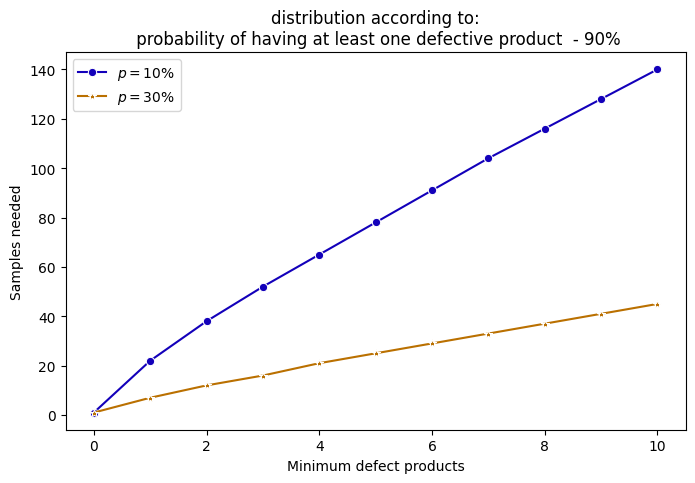

In [9]:
def prec_num(s_rate, prob):
    # s_rate = probality asked for (as same as a_rate in find_n))
    # prob - probality of defective product (as same as p in find_n)
    
    n_of_defects = np.vstack((np.arange(0,11),np.zeros(11))).astype(int)
    # creating a 2-d array:
        # n_of_defects[0] - number of minimum defects products
        # n_of_defects[1] - number of necessary independent samples according to it and the the s_rate
            
    for num in n_of_defects[0]:
        # num - minimum number of defectives products that are asked for checking  (as same as p in find_n)
        n_of_defects[1][num] = find_trials(s_rate, prob, num)
    
    return n_of_defects
    
data_1 = prec_num(0.9, 0.1)
data_2 = prec_num(0.9, 0.3)

plt.figure(figsize=(8,5), dpi = 100)

# create a ploe of minimum number of defectives products according to number of necessary independent samples
sns.lineplot(x = data_1[0], y = data_1[1], marker='o', color='#1300ba')
sns.lineplot(x = data_2[0], y = data_2[1], marker='*', color='#ba7000')

plt.title('distribution according to:\n probability of having at least one defective product  - 90%')
plt.xlabel('Minimum defect products')
plt.ylabel('Samples needed')
plt.legend(['$p=10$%','$p=30\%$']);

#### According to the graph above, there are few important conclusions.

each value in each plot represents a cdf that was calculated in the function find_d.
the cdf is a sum of pmf's, and that is why both of the plots are in positive incline:
    the greater the number of <B>minimum</B> products, you need more samples. 
It seems to be almost linear, although it is not linear, but Cumulative distributed (CDF).

Nevertheless, the PMF is calculated according to the Binmoial ditribution:
$$P(X=k) =  {n\choose k} p^{k}(1-p)^{n-k}$$
in this case, according to the formula it is clearly that the relation between p (probality of defective product)and k (number of defect products) is non linear.

In addition, while a higher defective rate $(p)$ requires a smaller $n$, a greater number of defectives requires a higher $n$. So we have a counter effect between the two RV's. Let us investigate the strenghts of these effects by iterating over $n$

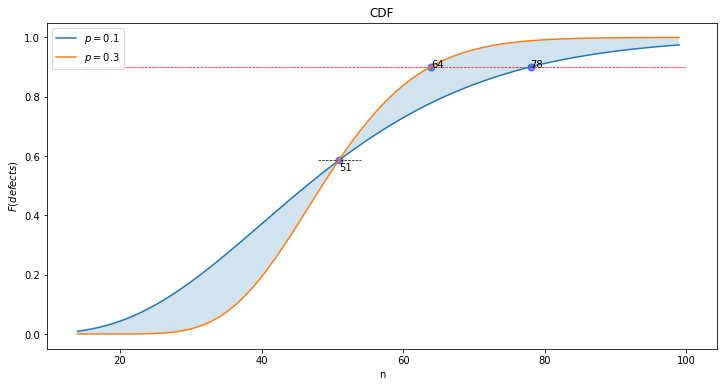

In [85]:
plt.figure(figsize=(12,6))
n = np.arange(14, 100)
p_01 = binom.sf(4, n, 0.1)
p_03 = binom.sf(14, n, 0.3)
plt.plot(n, p_01, label='$p=0.1$')
plt.plot(n, p_03, label='$p=0.3$')
plt.title('CDF'), plt.ylabel('$F(defects)$'), plt.xlabel('n')
plt.hlines(y=[0.9, 0.587], xmin=[15, 48], xmax=[100, 54], color=['r', 'black'], lw=0.7, ls='--')
plt.scatter(x=[51, 64, 78], y=[0.587, 0.9, 0.9], color='blue', s=50, alpha=0.5)
plt.fill_between(x=n, y1=p_01, y2=p_03, alpha=0.2)
plt.annotate(text=51, xy=[51, 0.55]), plt.annotate(64, xy=[64, 0.9]), plt.annotate(78, xy=[78, 0.9])
plt.legend();

As can be seen above, the effect of a higher defective rate ($p$) is weaker than the effect of the number of defectives required for every $n<51$, and outperforms it for every $n>51$. Moreover, looking at the orange graph, it looks like we have an inflection point exactly at $n=51$.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

First we will assign random values to an array by numpy.random.normal.
As for the scale (std) - we assign an estimated value and fix it after we check the findings.

In [11]:
pop_sh = 16000
pop_rg = 22000

mean_sh = 6300
mean_rg = 4200

med_sh = 4600
med_rg = 4600

std_sh = 800 # estimated
std_rg = 1000 # estimated

#creating first secnario data

np.random.seed(0) # use random.seed in order to generate a fixed database
sh_data1 = np.sort(np.random.normal(mean_sh, std_sh, pop_sh)).astype(int)
np.random.seed(1)
rg_data1 = (np.sort(np.random.normal(mean_rg, std_rg*2, pop_rg)).astype(int))*2

# creating second scenario data, change the distribution by changing the only unfixed value - the std (change is differently)
np.random.seed(2)
sh_data2 = np.sort(np.random.normal(mean_sh, std_sh*1.5, pop_sh)).astype(int)
np.random.seed(3)
rg_data2 = (np.sort(np.random.normal(mean_rg, std_rg*3, pop_rg)).astype(int))*2

After creating two scenarios, we must 'manage' the data to the median and IQR.
1. Replace negative values
2. Inserting the median value
3. Fix the iqr. If necessary, change the std in the original creating data function
4. Define a function to fix the mean and sort the data

#### Replace negative values

In [12]:
def rep_neg(db, name):
    #db - town's renting database
    #name - town's name
  
    temp = np.copy(db)  # copying the db in order to change it (and not use pointer)
    print(name, 'before replacing:', temp)
    
    # changing all the values to the absolut value in order to prevent negative values
    temp[:] = np.sort(abs(temp[:])+1)
    print(name, 'after replacing:', temp,'\n')
    
    return temp

#### Fix the median value

In [13]:
# all the datasets have even number of elemnts, so in order to fix the median value we need to change the n/2-1 and n/2+1 element

def fix_med(db, med):
    # db - town's database
    # med - required median
    
    new_pop = np.copy(db)   

    while abs((new_pop[int(new_pop.shape[0]*0.5)] - med)) > 50:
        # a while loop comparing the diffrence between the current and the desired median

        if new_pop[int(new_pop.shape[0]*0.5)] > med: 
            # if the current median is bigger, force cheaper rents on the database
            
            new_pop[random.randrange(0, new_pop.shape[0]-1)] = random.randrange(1, med-10)
            #insert a random med value in order to upgrade the desired median (add cheaper data and 'upgrade' the median)
            # randrange to prevent a multiple constant value
            
        elif new_pop[int(new_pop.shape[0]*0.5)] < med:
            # if the current median is smaller, force more expensive rents on the database

            #new_pop[random.randrange(0, new_pop.shape[0]-1)] = random.randrange(med+10, new_pop[-1])
            new_pop[random.randrange(0, 10000)] = random.randrange(med+10, 10000)
            #insert med value in order to decrease the disired median (add expencive data and 'lower' the median)
            # randrange to prevent a multiple constant value

        
        new_pop = np.sort(new_pop) # sort the new database

    
    
    return new_pop




#### Check the IQR diffrence 

In [14]:
def iqr_town(db_1, db_2, name_1, name_2):
    # db_n - a town database
    #name_n - a town's name in correlation
    
     # calculate db_1 IQR. index Q1 and Q3 using the length of the array - shape[0]
    iqr_1 = db_1[int(db_1.shape[0]*0.75)] - db_1[int(db_1.shape[0]*0.25)] 
    iqr_2 = db_2[int(db_2.shape[0]*0.75)] - db_2[int(db_2.shape[0]*0.25)]  
    
    # print the town with the bigger IQR (according to the diffrences betwee nthe IQR's).
    # first town - the 1 value in the function
    if iqr_1 > iqr_2: print(name_1, 'town has bigger IQR by:', int(iqr_1-iqr_2),'RCU')
    if iqr_1 < iqr_2: print(name_2, 'town has bigger IQR by:', int(iqr_2-iqr_1),'RCU','\n')

#### Fix the mean and sort the database

In [15]:
def fix_mean(pop, mean, town):
    # pop - array of rent prices data
    # mean - the required mean
    
    new_pop = np.copy(pop)
    print(town, "\nthe current mean is:",round(new_pop.mean()))
    
    while abs(int(new_pop.mean()) - mean) > 50:
        # a while loop comparing the diffrence between the current and the desired mean
        
        if new_pop.mean() > mean: 
            # if the current mean is bigger, force cheaper rents on the database
            new_pop[random.randrange(0, new_pop.shape[0]-1)] = random.randrange(1, mean) #insert a low value in order to reduce the mean (make the cheapest rents to be even cheaper)
                
        else:
            # if the current mean is smaller, force more expensive rents on the database
            new_pop[random.randrange(0, new_pop.shape[0]-1)] = random.randrange(4600, int(new_pop[-1]*2)) #insert a random value similar to the last value in order to increase the mean
        
    new_pop = np.sort(new_pop) # the sort the new database
    print("the fixed mean is:", round(new_pop.mean()))
    
    return new_pop

##### Scenario A

SH1 before replacing: [3307 3344 3422 ... 9065 9093 9341]
SH1 after replacing: [3308 3345 3423 ... 9066 9094 9342] 

RG1 before replacing: [-7310 -6224 -5404 ... 24234 24506 25072]
RG1 after replacing: [    1     1     3 ... 24235 24507 25073] 

RG1 town has bigger IQR by: 4314 RCU 

SH1 
the current mean is: 4316
the fixed mean is: 6250
RG1 
the current mean is: 6025
the fixed mean is: 4250
SH1 median: 4645
RG1 median: 4550
RG1 town has bigger IQR by: 1161 RCU 



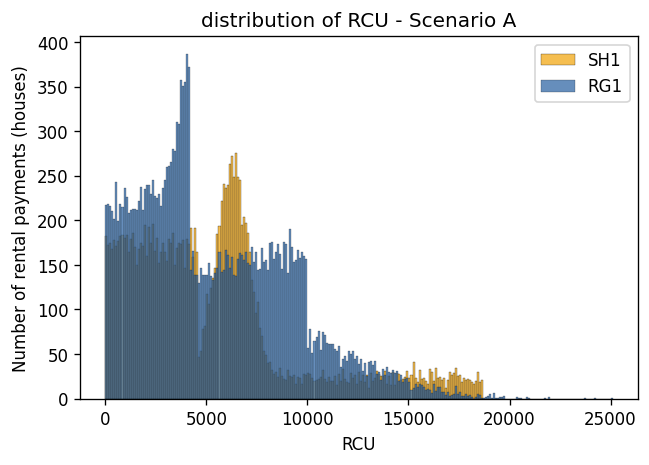

In [16]:
sh_data1 = rep_neg(sh_data1, "SH1")
rg_data1 = rep_neg(rg_data1, "RG1")

iqr_town(sh_data1, rg_data1, "SH1", "RG1")

# assign the median
sh_data1 = fix_med(sh_data1, med_sh)
rg_data1 = fix_med(rg_data1, med_rg)

# fix the mean
sh_data1 = fix_mean(sh_data1, mean_sh,"SH1")
rg_data1 = fix_mean(rg_data1, mean_rg,"RG1")

# assign the median again
sh_data1 = fix_med(sh_data1, med_sh)
rg_data1 = fix_med(rg_data1, med_rg)

print("SH1 median:", sh_data1[int(sh_data1.shape[0]*0.5)])
print("RG1 median:", rg_data1[int(rg_data1.shape[0]*0.5)])

iqr_town(sh_data1, rg_data1, "SH1", "RG1")
plt.figure(figsize=(6,4), dpi = 120)

# create histplots of bins that are sized of width as defined
sns.histplot(sh_data1, binwidth = 100, color='#f2a916', edgecolor='k')
sns.histplot(rg_data1, binwidth = 100, color='#3369a6', edgecolor='k')
plt.xlabel('RCU'), plt.ylabel('Number of rental payments (houses)')
plt.legend(['SH1','RG1'])
plt.title('distribution of RCU - Scenario A');

##### Scenario B

SH2 before replacing: [ 1547  2001  2047 ... 10747 11230 11260]
SH2 after replacing: [ 1548  2002  2048 ... 10748 11231 11261] 

RG2 before replacing: [-14788 -14098 -13854 ...  30614  32948  34600]
RG2 after replacing: [    1     3     3 ... 30615 32949 34601] 

SH1 
the current mean is: 6299
the fixed mean is: 6299
RG1 
the current mean is: 8770
the fixed mean is: 4251
SH2 median: 4648
RG2 median: 4553
RG2 town has bigger IQR by: 1852 RCU 



Text(0.5, 1.0, 'distribution of RCU - Scenario B')

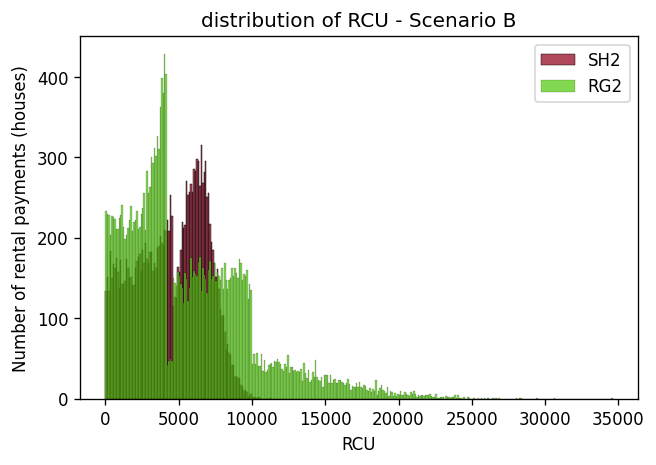

In [17]:
sh_data2 = rep_neg(sh_data2, "SH2")
rg_data2 = rep_neg(rg_data2, "RG2")

sh_data2 = fix_mean(sh_data2, mean_sh,"SH1")
rg_data2 = fix_mean(rg_data2, mean_rg,"RG1")

sh_data2 = fix_med(sh_data2, med_sh)
rg_data2 = fix_med(rg_data2, med_rg)

print("SH2 median:", sh_data2[int(sh_data1.shape[0]*0.5)])
print("RG2 median:", rg_data2[int(rg_data1.shape[0]*0.5)])

iqr_town(sh_data2, rg_data2, "SH2", "RG2")
plt.figure(figsize=(6,4), dpi = 120)

# create histplots of bins that are sized of width as defined
sns.histplot(sh_data2, binwidth = 100, color='#940a24', edgecolor='k')
sns.histplot(rg_data2, binwidth = 100, color='#5acc18', edgecolor='k')
plt.xlabel('RCU')
plt.ylabel('Number of rental payments (houses)')
plt.legend(['SH2','RG2'])
plt.title('distribution of RCU - Scenario B')

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

##### Scenario C

SH1 before replacing: [-4747 -4324 -2460 ... 15985 16015 16305]
SH1 after replacing: [   16    17    25 ... 15986 16016 16306] 

RG1 before replacing: [-14176 -11836  -9270 ...  26308  26864  29526]
RG1 after replacing: [    1     1     1 ... 26309 26865 29527] 

SH3 
the current mean is: 4953
the fixed mean is: 6251
RG3 
the current mean is: 6241
the fixed mean is: 4251
SH3 median: 4649
RG3 median: 4551 

RG3 town has bigger IQR by: 918 RCU 

SH3 town variance : 28294414.267980862
RG3 town variance : 15912298.859999001


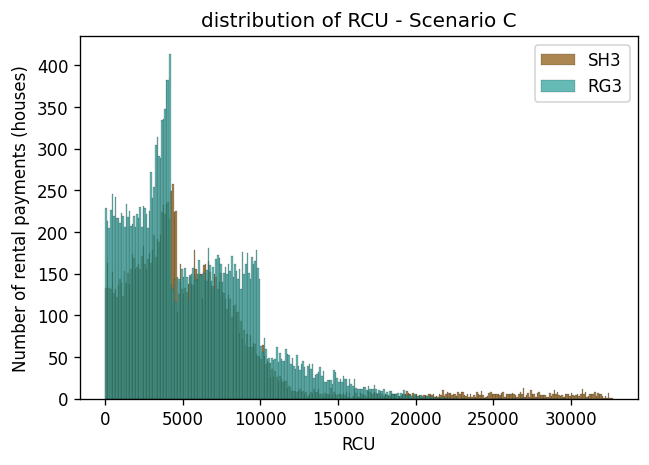

In [18]:
#np.random.seed(4)
sh_data3 = np.sort(np.random.normal(mean_sh, std_sh*3, pop_sh)).astype(int)
#np.random.seed(5)

# for rg_data3 scale (std) we assigned smaller std than std_sh by 1 - in order to keep the IQR of SH smaller
rg_data3 = np.sort(np.random.normal(mean_rg, std_sh*2.95, pop_rg)).astype(int)*2

sh_data3 = rep_neg(sh_data3, "SH1")
rg_data3 = rep_neg(rg_data3, "RG1")

sh_data3 = fix_med(sh_data3, med_sh)
rg_data3 = fix_med(rg_data3, med_rg)

sh_data3 = fix_mean(sh_data3, mean_sh,"SH3")
rg_data3 = fix_mean(rg_data3, mean_rg,"RG3")

sh_data3 = fix_med(sh_data3, med_sh)
rg_data3 = fix_med(rg_data3, med_rg)

print("SH3 median:", sh_data3[int(sh_data1.shape[0]*0.5)])
print("RG3 median:", rg_data3[int(rg_data1.shape[0]*0.5)],'\n')

iqr_town(sh_data3, rg_data3, "SH3", "RG3")
print('SH3 town variance :',sh_data3.var())
print('RG3 town variance :',rg_data3.var())
plt.figure(figsize=(6,4), dpi = 120)

# create histplots of bins that are sized of width as defined
sns.histplot(sh_data3, binwidth = 100, color='#915e17', edgecolor='k')
sns.histplot(rg_data3, binwidth = 100, color='#31a39d', edgecolor='k')
plt.xlabel('RCU'), plt.ylabel('Number of rental payments (houses)')
plt.title('distribution of RCU - Scenario C')
plt.legend(['SH3','RG3']);

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [19]:
mean_phi_sh = 12500
mean_phi_rg = 8500

med_phi_sh = 12000
med_phi_rg = 8000

std_phi_sh = 36000 # estimated
std_phi_rg = 31500 # estimated

# creating PHI data for each city
np.random.seed(6) # use random.seed in order to generate a fixed database
sh_phi = np.sort(np.random.normal(mean_phi_sh, std_phi_sh, pop_sh)).astype(int)
np.random.seed(7)
rg_phi = np.sort(np.random.normal(mean_phi_rg, std_phi_rg, pop_rg)).astype(int)*2

# raplacing negative values and round the numbers
sh_phi = rep_neg(sh_phi, "SH")
rg_phi = rep_neg(rg_phi, "RG")

# assign the median
sh_phi = fix_med(sh_phi, med_phi_sh)
rg_phi = fix_med(rg_phi, med_phi_rg)

print("SH PHI median:", sh_phi[int(sh_phi.shape[0]*0.5)])
print("RG PHI median:", rg_phi[int(rg_phi.shape[0]*0.5)])

# fixing the mean
sh_phi = fix_mean(sh_phi, mean_phi_sh,"SH")
rg_phi = fix_mean(rg_phi, mean_phi_rg,"RG")

# stacking phi and rental payments (scenario A) to single 2D array
sh = np.vstack((sh_data2, sh_phi))
rg = np.vstack((sh_data2, sh_phi))

def check_cov(db,std_rent,std_phi,name):
    # calculate the covariance of 2D array "db" along the columns (between 2 rows)
    # name - name of town
    # calculate 𝐶𝑜𝑣(𝑟𝑒𝑛𝑡,𝑃𝐻𝐼) = np.cov(sh)[0][1] (covariance matrix)
    # the variable that was used to fix the covariance - std_phi_xx

    cov_db = np.round(100*(np.cov(db)[0][1]/(std_rent*std_phi)),2) # transfer the covariance to precentage with 2 decimals
    print('\n', name, 'Observed covariance\'s (rent and PHI) a:', cov_db,'%') 
    
check_cov(sh, std_sh, std_phi_sh, 'SH')
check_cov(rg, std_rg, std_phi_rg, 'RG')

SH before replacing: [-142392 -140388 -126876 ...  148393  153126  170112]
SH after replacing: [     1      3      8 ... 148394 153127 170113] 

RG before replacing: [-214300 -209562 -205664 ...  241166  252802  259660]
RG after replacing: [     1     13     13 ... 241167 252803 259661] 

SH PHI median: 12049
RG PHI median: 8049
SH 
the current mean is: 22112
the fixed mean is: 12550
RG 
the current mean is: 30496
the fixed mean is: 8550

 SH Observed covariance's (rent and PHI) a: 96.58 %

 RG Observed covariance's (rent and PHI) a: 88.3 %


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

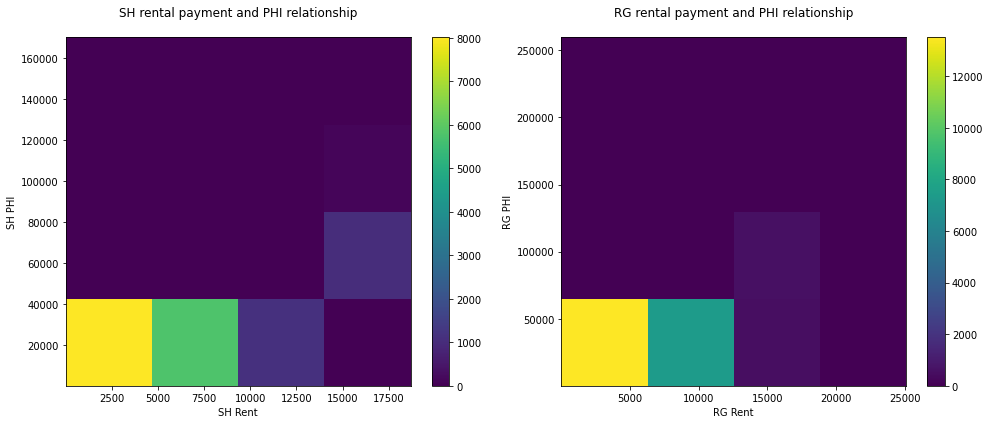

In [20]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
h1 = ax[0].hist2d(x=sh_data1,y=sh_phi,cmap = 'viridis',bins=4)
ax[0].set_xlabel('SH Rent'), ax[0].set_ylabel('SH PHI')
ax[0].set_title('SH rental payment and PHI relationship\n')

h2 = ax[1].hist2d(x=rg_data1,y=rg_phi,cmap = 'viridis',bins=4)
ax[1].set_xlabel('RG Rent'), ax[1].set_ylabel('RG PHI')
ax[1].set_title('RG rental payment and PHI relationship\n');
fig.colorbar(h1[3], ax=ax[0]), fig.colorbar(h2[3], ax=ax[1])
plt.tight_layout()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [21]:
from scipy.stats import multinomial

In [22]:
X = multinomial(20, [0.2,0.1,0.1,0.1,0.2,0.3])
X.rvs()

array([[5, 1, 4, 0, 6, 4]])

In [23]:
X = multinomial(20, [0.2,0.1,0.1,0.1,0.2,0.3])
Y = X.rvs()[:,1:4].sum(axis=1)
Y

array([6])

We know that $X_{2},X_{3},X_{4}\sim Bin(20,0.1)$

Thus, $Y\sim Bin(20,0.3)$.

In [24]:
k=100
samples = X.rvs(size=k)[:,1:4]

In [25]:
Y_samples = samples.sum(axis=1)
Y_samples

array([ 6,  5,  6,  7,  6,  7,  6,  6,  5,  5,  5,  4,  4,  3,  8,  4,  4,
        6,  4,  5,  7,  7,  2,  7,  9,  5,  6,  7,  9,  8,  9,  8,  7,  8,
        4,  6,  7,  9, 10,  6,  5,  8,  6,  5,  7, 10,  6,  4, 10,  5,  4,
        5,  3,  6,  5,  5,  8,  7,  4,  7,  5,  5,  8,  6,  6,  9,  8,  6,
        3,  3, 10,  6,  7,  9,  5,  6,  7,  5,  4,  5,  5,  3,  4,  3,  8,
        3,  5,  7,  6,  3,  4,  7,  2,  7,  5,  8,  2,  5,  7,  4])

In [26]:
Y_samples_E = Y_samples.mean()
Y_samples_E  # Should be close to np=6

5.88

In [27]:
ECM_3 = ((Y_samples - Y_samples_E)**3).mean()  # Empirical centralized third moment
ECM_3

1.141344000000001

One can look at the calculation in class for the centralized third moment of the binomial distribution and wonder if the following holds:
$$\gamma_{3}=E\left[\sum_{i=1}^{n}\left(X_{i}-0.3\right)^{3}\right]$$
Where $X_i$ is an indicator, stating whether the $i$'th trial is a success.

Doing so, yields:

In [28]:
20*0.3*(1-0.3)*(1-0.6)

1.6799999999999997

However, $X_{2},X_{3},X_{4}$ are collectively dependent, as they need to sum to $n-l$, where $l$ is the sum of $X_{1}$ and $X_{5}$. This should affect $\gamma_3$, beacuse we only need to sum up to $n-l$ instead of $n$.

Consider the following calculation of $\gamma_3$ for 1000 different expirements. We take the average of them and actually get a convergence to the calculation in class!

In [50]:
moments = []
trials = 1000
k=100
for i in range(trials):
    X = multinomial(20, [0.2,0.1,0.1,0.1,0.2,0.3])
    samples = X.rvs(size=k)[:,1:4]
    Y_samples = samples.sum(axis=1)
    Y_samples_E = Y_samples.mean()
    ECM_3 = ((Y_samples - Y_samples_E)**3).mean()
    moments.append(ECM_3)
np.array(moments).mean()

1.673114832

Even though we expect a slight different result, it should be close to the calculation of the binomial.

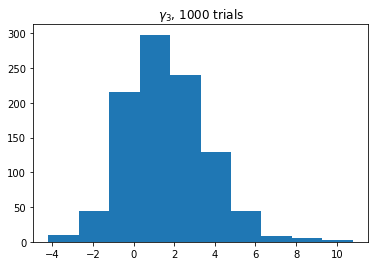

In [30]:
plt.hist(moments);
plt.title(f'$\gamma_3$, {trials} trials');

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

Remember that:
1. $Var(X)=E[X^2]-E[X]^2$
2. $Cov(X_{i},X_{j})=E[X_{i}X_{j}]-E[X_{i}]E[X_{j}]$

Thus:

$$Var\left(X+Y+Z\right)=E\left[\left(X+Y+Z\right)^{2}\right]-E\left[X+Y+Z\right]^{2}=E\left[X^{2}+2XY+2XZ+Y^{2}+2YZ+Z^{2}\right]-\left(E\left[X\right]+E\left[Y\right]+E\left[Z\right]\right)^{2}=$$
$$\underbrace{E\left[X^{2}\right]}+2E\left[XY\right]+2E\left[XZ\right]+\underbrace{E\left[Y^{2}\right]}+2E\left[YZ\right]+\underbrace{E\left[Z^{2}\right]}-\underbrace{E\left[X\right]^{2}}-2E\left[X\right]E\left[Y\right]-\underbrace{E\left[Y\right]^{2}}-2E\left[Y\right]E\left[Z\right]-2E\left[X\right]E\left[Z\right]-\underbrace{E\left[Z\right]^{2}}=$$
$$Var\left(X\right)+Var\left(Y\right)+Var\left(Z\right)+2Cov\left(X,Y\right)+2Cov\left(X,Z\right)+2Cov\left(Y,Z\right)$$

If $X_{i},X_{j}$ are pairwise independent, we have:
$$E[X_{i}X_{j}]=E[X_{i}]E[X_{j}]$$
Plugging it to $Var(X,Y,Z)$ yields:

$$Var(X,Y,Z)=Var(X)+Var(Y)+Var(Z)$$

If $X,Y,Z$ are pairwise indepenent, they are not necessarly collectively independent, as seen in the MultiNomial distribution, whereas every entry $X_i$ in the multinomial vector is a binomial RV by its own with $(n,p_i)$ where $n$ is the same $n$ as in the Multinomial RV and $p_i$ is the corresponding $p$ in the $i$th index the multinomial probability vector. Hence, all $X_i$ are pairwise independent. 

However, if $X_1>0$, then it is sufficient that $P\{X_i=n\}=0,\forall i\ge2$, making them collectively dependent.

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [31]:
from scipy.stats import randint, rv_discrete

In [34]:
def NFoldConv(P, n):
    pmf = P.pmf(np.arange(P.a, P.b+1))
    pmfs = pmf
    for i in range(n-1):  # Convolution is associative
        pmfs = np.convolve(pmfs, pmf)
    
    vals = np.arange(P.a*n, P.b*n+1)
    return rv_discrete(values=(vals, pmfs)) 

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [35]:
P = randint(1, 9)  # A single octahedron

In [36]:
Q = NFoldConv(P, 17)  # Sum of 17 octahedrons

The mode is 76


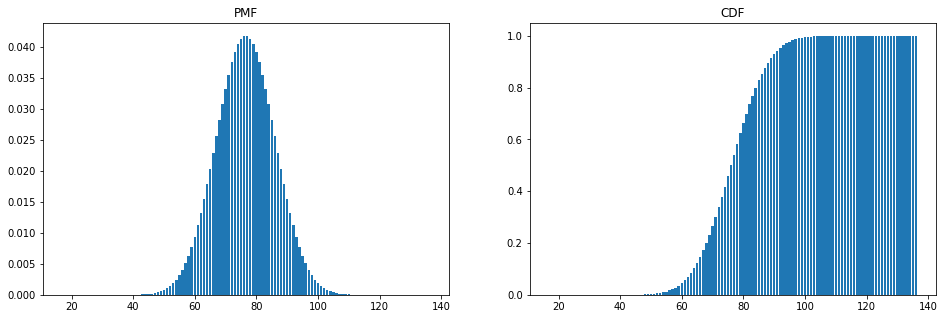

In [37]:
x = np.arange(Q.a, Q.b+1)
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].bar(x,Q.pmf(x)), ax[0].set_title('PMF')
ax[1].bar(x,Q.cdf(x)), ax[1].set_title('CDF')
print('The mode is', x[Q.pmf(x).argmax()])